In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import random

In [31]:
X = np.array(random.sample(range(70),64)) #creating random 64 samples for range between 0 to 70
print("\nX: ", X)


X:  [30 48 32 25 40  8 52 11  5 57 50 53  7 47  1 58 34 49  6 18  0 64 63 51
 13 29 23 46 38  2 24 43 55 59 17 20 31 27 45  4 60 12 14 62 66 16 54 65
 35 19  9 39 44 26  3 37 15 22 42 36 41 69 56 67]


In [32]:
def dft(x): #calculating dft for x
    N = len(x)
    D = np.ones((N,N),dtype = complex)
    for i in range(1,N):
        for k in range(1,N):
            D[i][k] = np.exp(-2j*(np.pi*i*k)/N)

    y = np.matmul(D,np.transpose(x))
    return np.transpose(y)

In [33]:
def idft(y): #calculating idft for x
    N = len(y)
    D = np.ones((N,N),dtype = complex)
    for i in range(1,N):
        for k in range(1,N):
            D[i][k] = np.exp(2j*(np.pi*i*k)/N)

    z = np.matmul(D/N,np.transpose(y))
    return np.transpose(z)

In [34]:
def Edft(x,L): #calculating error dft for x
    y = dft(x)
    N = len(y)
    a = int((N+1-L)/2)
    b = int((N-1+L)/2)
    for i in range(a,b+1):
        y[i] = 0
    x_m = idft(y)

    return ((x - x_m) ** 2).mean(axis=0)

In [35]:
def dct(x): #calculating dct for x
    N  = len(x)
    Y = np.array([0.]*N)
    for k in range(N):
        for i in range(N):
            Y[k] += 2.0*x[i]*math.cos(math.pi*k*(2.0*i+1)/(2.0*N))
    return Y

In [36]:
def idct(y): #calculating idct for x
    N  = len(y)
    Y = np.array([0.]*N)
    for i in range(N):
        for k in range(N):
            if k == 0:
                CONST = 0.5
            else:
                CONST = 1    
            Y[i] += CONST*y[k]*math.cos(math.pi*k*(2*i+1)/(2*N))
    return Y/N

In [37]:
def Edct(x,L): #calculating error dct for x
    y = dct(x)
    N = len(y)
    for i in range(N-L,N):
        y[i] = 0
    x_m = idct(y)

    return ((x - x_m) ** 2).mean(axis=0)

In [38]:
h2 = np.array([[1,1],[1,-1]])/math.sqrt(2) #calculating haar transform for x
def haar_mat(n):
    n = int(n)
    if n == 1:
        return h2
    else:
        a = np.kron(haar_mat(n-1),[1,1])
        b = np.kron(np.identity(int(math.pow(2,n-1)))*math.pow(2,(n-1)/2.0),[1,-1])
        #print(np.concatenate((a,b),axis=0))
        return np.concatenate((a,b),axis=0)/math.sqrt(2)

def haar(x):
    return np.matmul(haar_mat(math.log(len(x),2)),np.transpose(x))

In [39]:
def ihaar(y): #calculating inverse haar for x
    n = int(math.log(len(y),2))
    N = len(y)
    hn = haar_mat(n)
    return np.matmul(np.transpose(hn)/N,np.transpose(y))

In [40]:
def Ehaar(x,L): #calculating error for haar transform
    y = haar(x)
    N = len(y)
    for i in range(N-L,N):
        y[i] = 0
    x_m = ihaar(y)

    return ((x - x_m) ** 2).mean(axis=0)

C:\Users\Nikhil Bhelave\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


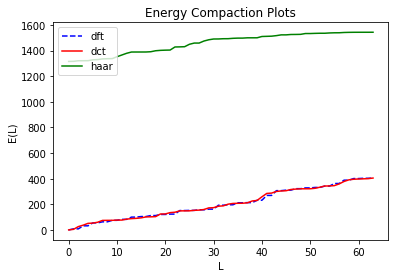

In [41]:
plt.figure()
ydft = [0.]*64
ydct = [0.]*64
yhaar = [0.]*64
for L in range(64):
    ydft[L] = Edft(X,L)
    ydct[L] = Edct(X,L)
    yhaar[L] = Ehaar(X,L) 
plt.title('Energy Compaction Plots')
plt.plot(range(64),ydft,'--b',label = "dft")
plt.plot(range(64),ydct,'-r',label = 'dct')
plt.plot(range(64),yhaar,'-g',label = 'haar')
plt.legend(loc='upper left')    
plt.xlabel("L")
plt.ylabel("E(L)")
plt.show()